In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N=50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x=numpy.linspace(x_start,x_end, num=N)
y=numpy.linspace(y_start,y_end, num=N)
X,Y=numpy.meshgrid(x,y)

In [3]:
class Source:
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x,y
        
    def velocity(self, X, Y):
        u=(self.strength)/(2*math.pi)*(X - self.x) / ((X - self.x)**2 + (Y - self.y)**2)
        v=(self.strength)/(2*math.pi)*(Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2) 
        return u,v  
    
    def stream_function(self, X, Y):
        psi=self.strength/(2*math.pi)*numpy.arctan2((Y-self.y), (X-self.x))
        return psi

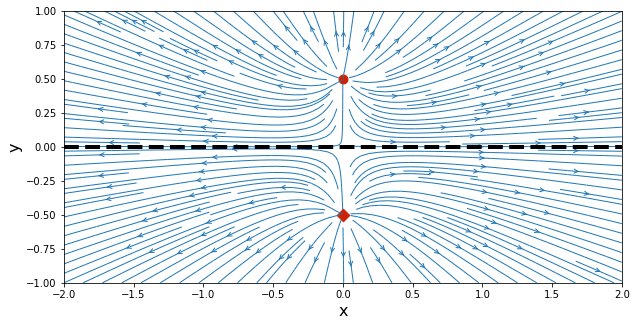

In [10]:
strength_source = 1.0
x_source, y_source = 0.0, 0.5

# create the source
source = Source(strength_source, x_source, y_source)

# find the velocity feild and the stream function on the mesh grid
u_up,v_up=source.velocity(X,Y)
psi_up=source.stream_function(X,Y)

# create the images to use
source_image = Source(strength_source, x_source, -y_source)
u_opp,v_opp=source_image.velocity(X,Y)
psi_opp=source_image.stream_function(X,Y)

# use superposition of the source and the image
u=u_up+u_opp
v=v_up+v_opp
psi=psi_up+psi_opp

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->');
pyplot.scatter(source.x, source.y, color='#CD2305', s=80, marker='o');
pyplot.scatter(source_image.x, source_image.y, color='#CD2305', s=80, marker='D');
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [27]:
# now we want to do the same thing but with vorticies
class Vortex:
    def __init__(self, strength, x, y):
    
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
       
        u = (+self.strength / (2 * math.pi) *
                  (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        v = (-self.strength / (2 * math.pi) *
                  (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        return u,v
        
    def stream_function(self, X, Y):
    
        psi = (-self.strength / (4 * math.pi) *
                    numpy.log((X - self.x)**2 + (Y - self.y)**2))
        return psi

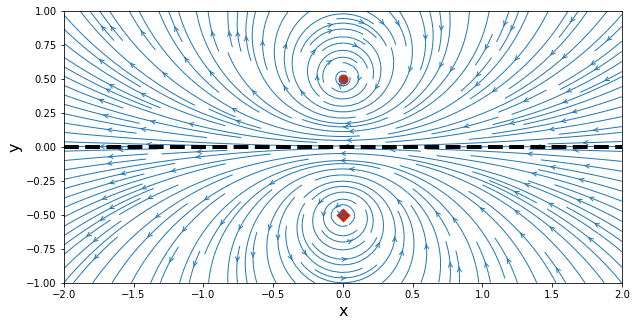

In [28]:
strength_vortex = 1.0                  # strength of the vortex
x_vortex, y_vortex = 0.0, 0.5          # location of the vortex

# create a vortex and computes velocity and stream-function
vortex = Vortex(strength_vortex, x_vortex, y_vortex)
un,vn=vortex.velocity(X, Y)
psin=vortex.stream_function(X, Y)

# create the image of the vortex and computes velocity and stream-function
vortex_image = Vortex(-strength_vortex, x_vortex, -y_vortex)
unn,vnn=vortex_image.velocity(X, Y)
psinn=vortex_image.stream_function(X, Y)

# superposition of the vortex and its image
u = un + unn
v = vn + vnn
psi = psin+psinn

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex.x, vortex.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex_image.x, vortex_image.y, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

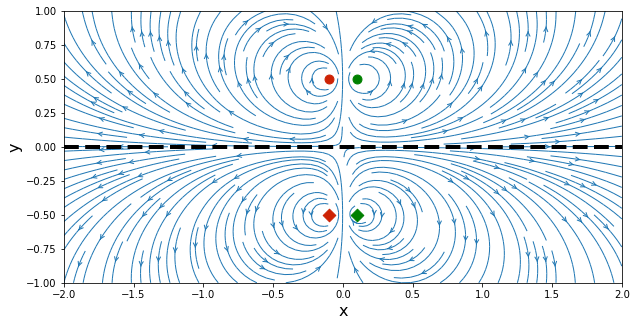

In [29]:
# pair of vorticies near the ground
strength_vortex = 1.0
x_vortex1,y_vortex1=-0.1,0.5
x_vortex2,y_vortex2=0.1,0.5

# create two vortices at different locations
vortex1 = Vortex(+strength_vortex, x_vortex1, y_vortex1)
vortex2 = Vortex(-strength_vortex, x_vortex2, y_vortex2)

#get the velocity and the streamfunction for each vortex
uw,vw=vortex1.velocity(X, Y)
psiw=vortex1.stream_function(X, Y)
uq,vq=vortex2.velocity(X, Y)
psiq=vortex2.stream_function(X, Y)

#create the image of the vortex
vortex1_image = Vortex(-strength_vortex, x_vortex1, -y_vortex1)
vortex2_image = Vortex(+strength_vortex, x_vortex2, -y_vortex2)

#get the velocity and the streamfunction for each vortex
uww,vww=vortex1_image.velocity(X, Y)
psiww=vortex1_image.stream_function(X, Y)
uqq,vqq=vortex2_image.velocity(X, Y)
psiqq=vortex2_image.stream_function(X, Y)

# use superposition
u=uw+uww+uq+uqq
v=vw+vww+vq+vqq
psi=psiw+psiww+psiq+psiqq

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex1.x, vortex1.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
pyplot.scatter(vortex1_image.x, vortex1_image.y, color='#CD2305', s=80, marker='D')
pyplot.scatter(vortex2_image.x, vortex2_image.y, color='g', s=80, marker='D')
pyplot.axhline(0.0, color='k', linestyle='--', linewidth=4);

In [30]:
# now we want to create a doublet near a plane wall parallel to the uniform flow
u_inf=1.0

u_freestream=u_inf*numpy.ones((N,N), dtype=float)
v_freestream=numpy.zeros((N,N),dtype=float)
psi_freestream=u_inf*Y

# create the class
class Doublet:
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):

        u = (-self.strength / (2 * math.pi) *
                  ((X - self.x)**2 - (Y - self.y)**2) /
                  ((X - self.x)**2 + (Y - self.y)**2)**2)
        v = (-self.strength / (2 * math.pi) *
                  2 * (X - self.x) * (Y - self.y) /
                  ((X - self.x)**2 + (Y - self.y)**2)**2)
        return u,v
            
    def stream_function(self, X, Y):
        
        psi = (-self.strength / (2 * math.pi) *
                    (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        return psi

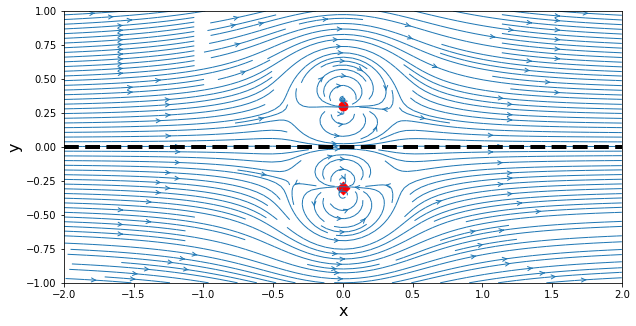

In [32]:
strength_doublet=1.0
x_doublet,y_doublet = 0.0, 0.3

# create a doublet (object of class Doublet)
doublet = Doublet(strength_doublet, x_doublet, y_doublet)

# compute the velocity and stream-function of the doublet on the mesh
ud, vd=doublet.velocity(X, Y)
psid=doublet.stream_function(X, Y)

# create the image of the doublet
doublet_image = Doublet(strength_doublet, x_doublet, -y_doublet)

# compute the velocity and stream-function of the image on the mesh
udd,vdd=doublet_image.velocity(X, Y)
psidd=doublet_image.stream_function(X, Y)

# superposition of the doublet and its image to the uniform flow
u=u_freestream+ud+udd
v=v_freestream+vd+vdd
psi=psi_freestream+psid+psidd

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(doublet.x, doublet.y, color='r', s=80, marker='o')
pyplot.scatter(doublet_image.x, doublet_image.y, color='r', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);